# Options Greeks: Sensitivity Analysis in Derivatives Pricing

## Introduction

The **Greeks** are fundamental risk measures in options pricing that quantify the sensitivity of an option's price to various parameters. They are essential tools for risk management, hedging strategies, and understanding the dynamic behavior of options portfolios.

In this notebook, we derive and implement the five primary Greeks under the **Black-Scholes framework**, providing both analytical formulas and numerical computations.

## Theoretical Foundation

### The Black-Scholes Model

Under the Black-Scholes model, the price of a European call option $C$ and put option $P$ are given by:

$$C = S_0 N(d_1) - K e^{-rT} N(d_2)$$

$$P = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$

where:

$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$

$$d_2 = d_1 - \sigma\sqrt{T}$$

Here:
- $S_0$ = Current stock price
- $K$ = Strike price
- $r$ = Risk-free interest rate
- $T$ = Time to maturity
- $\sigma$ = Volatility
- $N(\cdot)$ = Cumulative distribution function of standard normal

## The Five Primary Greeks

### 1. Delta ($\Delta$) - Price Sensitivity

Delta measures the rate of change of the option price with respect to the underlying asset price:

$$\Delta_{\text{call}} = \frac{\partial C}{\partial S} = N(d_1)$$

$$\Delta_{\text{put}} = \frac{\partial P}{\partial S} = N(d_1) - 1$$

**Interpretation:** Delta represents the equivalent position in the underlying asset. A delta of 0.5 means the option moves $0.50 for every $1 move in the stock.

### 2. Gamma ($\Gamma$) - Delta Sensitivity

Gamma measures the rate of change of delta with respect to the underlying price:

$$\Gamma = \frac{\partial^2 C}{\partial S^2} = \frac{\partial \Delta}{\partial S} = \frac{N'(d_1)}{S_0 \sigma \sqrt{T}}$$

where $N'(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$ is the standard normal PDF.

**Interpretation:** Gamma quantifies the convexity of the option payoff and is identical for calls and puts.

### 3. Theta ($\Theta$) - Time Decay

Theta measures the rate of change of the option price with respect to time:

$$\Theta_{\text{call}} = -\frac{\partial C}{\partial T} = -\frac{S_0 N'(d_1) \sigma}{2\sqrt{T}} - rKe^{-rT}N(d_2)$$

$$\Theta_{\text{put}} = -\frac{\partial P}{\partial T} = -\frac{S_0 N'(d_1) \sigma}{2\sqrt{T}} + rKe^{-rT}N(-d_2)$$

**Interpretation:** Theta represents time decay—the erosion of option value as expiration approaches.

### 4. Vega ($\nu$) - Volatility Sensitivity

Vega measures the rate of change of the option price with respect to volatility:

$$\nu = \frac{\partial C}{\partial \sigma} = S_0 \sqrt{T} N'(d_1)$$

**Interpretation:** Vega is identical for calls and puts and is always positive—higher volatility increases option value.

### 5. Rho ($\rho$) - Interest Rate Sensitivity

Rho measures the rate of change of the option price with respect to the risk-free rate:

$$\rho_{\text{call}} = \frac{\partial C}{\partial r} = KT e^{-rT} N(d_2)$$

$$\rho_{\text{put}} = \frac{\partial P}{\partial r} = -KT e^{-rT} N(-d_2)$$

**Interpretation:** Rho indicates how option prices change with interest rate movements.

## Implementation

We now implement these formulas in Python using NumPy and SciPy.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

In [2]:
class BlackScholesGreeks:
    """
    Class to compute Black-Scholes option prices and Greeks.
    
    Parameters
    ----------
    S : float or array
        Current stock price
    K : float
        Strike price
    T : float
        Time to maturity (in years)
    r : float
        Risk-free interest rate (annualized)
    sigma : float
        Volatility (annualized)
    """
    
    def __init__(self, S, K, T, r, sigma):
        self.S = np.asarray(S)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        
        # Compute d1 and d2
        self.d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
    
    def call_price(self):
        """European call option price."""
        return self.S * norm.cdf(self.d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2)
    
    def put_price(self):
        """European put option price."""
        return self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2) - self.S * norm.cdf(-self.d1)
    
    def delta_call(self):
        """Delta for call option."""
        return norm.cdf(self.d1)
    
    def delta_put(self):
        """Delta for put option."""
        return norm.cdf(self.d1) - 1
    
    def gamma(self):
        """Gamma (same for call and put)."""
        return norm.pdf(self.d1) / (self.S * self.sigma * np.sqrt(self.T))
    
    def theta_call(self):
        """Theta for call option (per year)."""
        term1 = -self.S * norm.pdf(self.d1) * self.sigma / (2 * np.sqrt(self.T))
        term2 = -self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2)
        return term1 + term2
    
    def theta_put(self):
        """Theta for put option (per year)."""
        term1 = -self.S * norm.pdf(self.d1) * self.sigma / (2 * np.sqrt(self.T))
        term2 = self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2)
        return term1 + term2
    
    def vega(self):
        """Vega (same for call and put)."""
        return self.S * np.sqrt(self.T) * norm.pdf(self.d1)
    
    def rho_call(self):
        """Rho for call option."""
        return self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(self.d2)
    
    def rho_put(self):
        """Rho for put option."""
        return -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-self.d2)

## Numerical Example

Let's compute the Greeks for a specific option contract with the following parameters:

In [3]:
# Option parameters
S0 = 100      # Current stock price
K = 100       # Strike price (at-the-money)
T = 0.5       # Time to maturity (6 months)
r = 0.05      # Risk-free rate (5%)
sigma = 0.2   # Volatility (20%)

# Create Greeks calculator
greeks = BlackScholesGreeks(S0, K, T, r, sigma)

# Compute and display results
print("Black-Scholes Option Pricing and Greeks")
print("=" * 45)
print(f"\nParameters:")
print(f"  Stock Price (S):     ${S0:.2f}")
print(f"  Strike Price (K):    ${K:.2f}")
print(f"  Time to Maturity:    {T:.2f} years")
print(f"  Risk-free Rate:      {r*100:.1f}%")
print(f"  Volatility:          {sigma*100:.1f}%")

print(f"\nOption Prices:")
print(f"  Call Price:          ${greeks.call_price():.4f}")
print(f"  Put Price:           ${greeks.put_price():.4f}")

print(f"\nGreeks for Call Option:")
print(f"  Delta (Δ):           {greeks.delta_call():.4f}")
print(f"  Gamma (Γ):           {greeks.gamma():.4f}")
print(f"  Theta (Θ):           {greeks.theta_call():.4f} per year")
print(f"  Theta (Θ):           {greeks.theta_call()/365:.4f} per day")
print(f"  Vega (ν):            {greeks.vega():.4f}")
print(f"  Rho (ρ):             {greeks.rho_call():.4f}")

print(f"\nGreeks for Put Option:")
print(f"  Delta (Δ):           {greeks.delta_put():.4f}")
print(f"  Gamma (Γ):           {greeks.gamma():.4f}")
print(f"  Theta (Θ):           {greeks.theta_put():.4f} per year")
print(f"  Theta (Θ):           {greeks.theta_put()/365:.4f} per day")
print(f"  Vega (ν):            {greeks.vega():.4f}")
print(f"  Rho (ρ):             {greeks.rho_put():.4f}")

Black-Scholes Option Pricing and Greeks

Parameters:
  Stock Price (S):     $100.00
  Strike Price (K):    $100.00
  Time to Maturity:    0.50 years
  Risk-free Rate:      5.0%
  Volatility:          20.0%

Option Prices:
  Call Price:          $6.8887
  Put Price:           $4.4197

Greeks for Call Option:
  Delta (Δ):           0.5977
  Gamma (Γ):           0.0274
  Theta (Θ):           -8.1160 per year
  Theta (Θ):           -0.0222 per day
  Vega (ν):            27.3587
  Rho (ρ):             26.4424

Greeks for Put Option:
  Delta (Δ):           -0.4023
  Gamma (Γ):           0.0274
  Theta (Θ):           -3.2394 per year
  Theta (Θ):           -0.0089 per day
  Vega (ν):            27.3587
  Rho (ρ):             -22.3231


## Visualization of Greeks

We now visualize how each Greek varies as a function of the underlying stock price, providing insight into the risk characteristics across different moneyness levels.

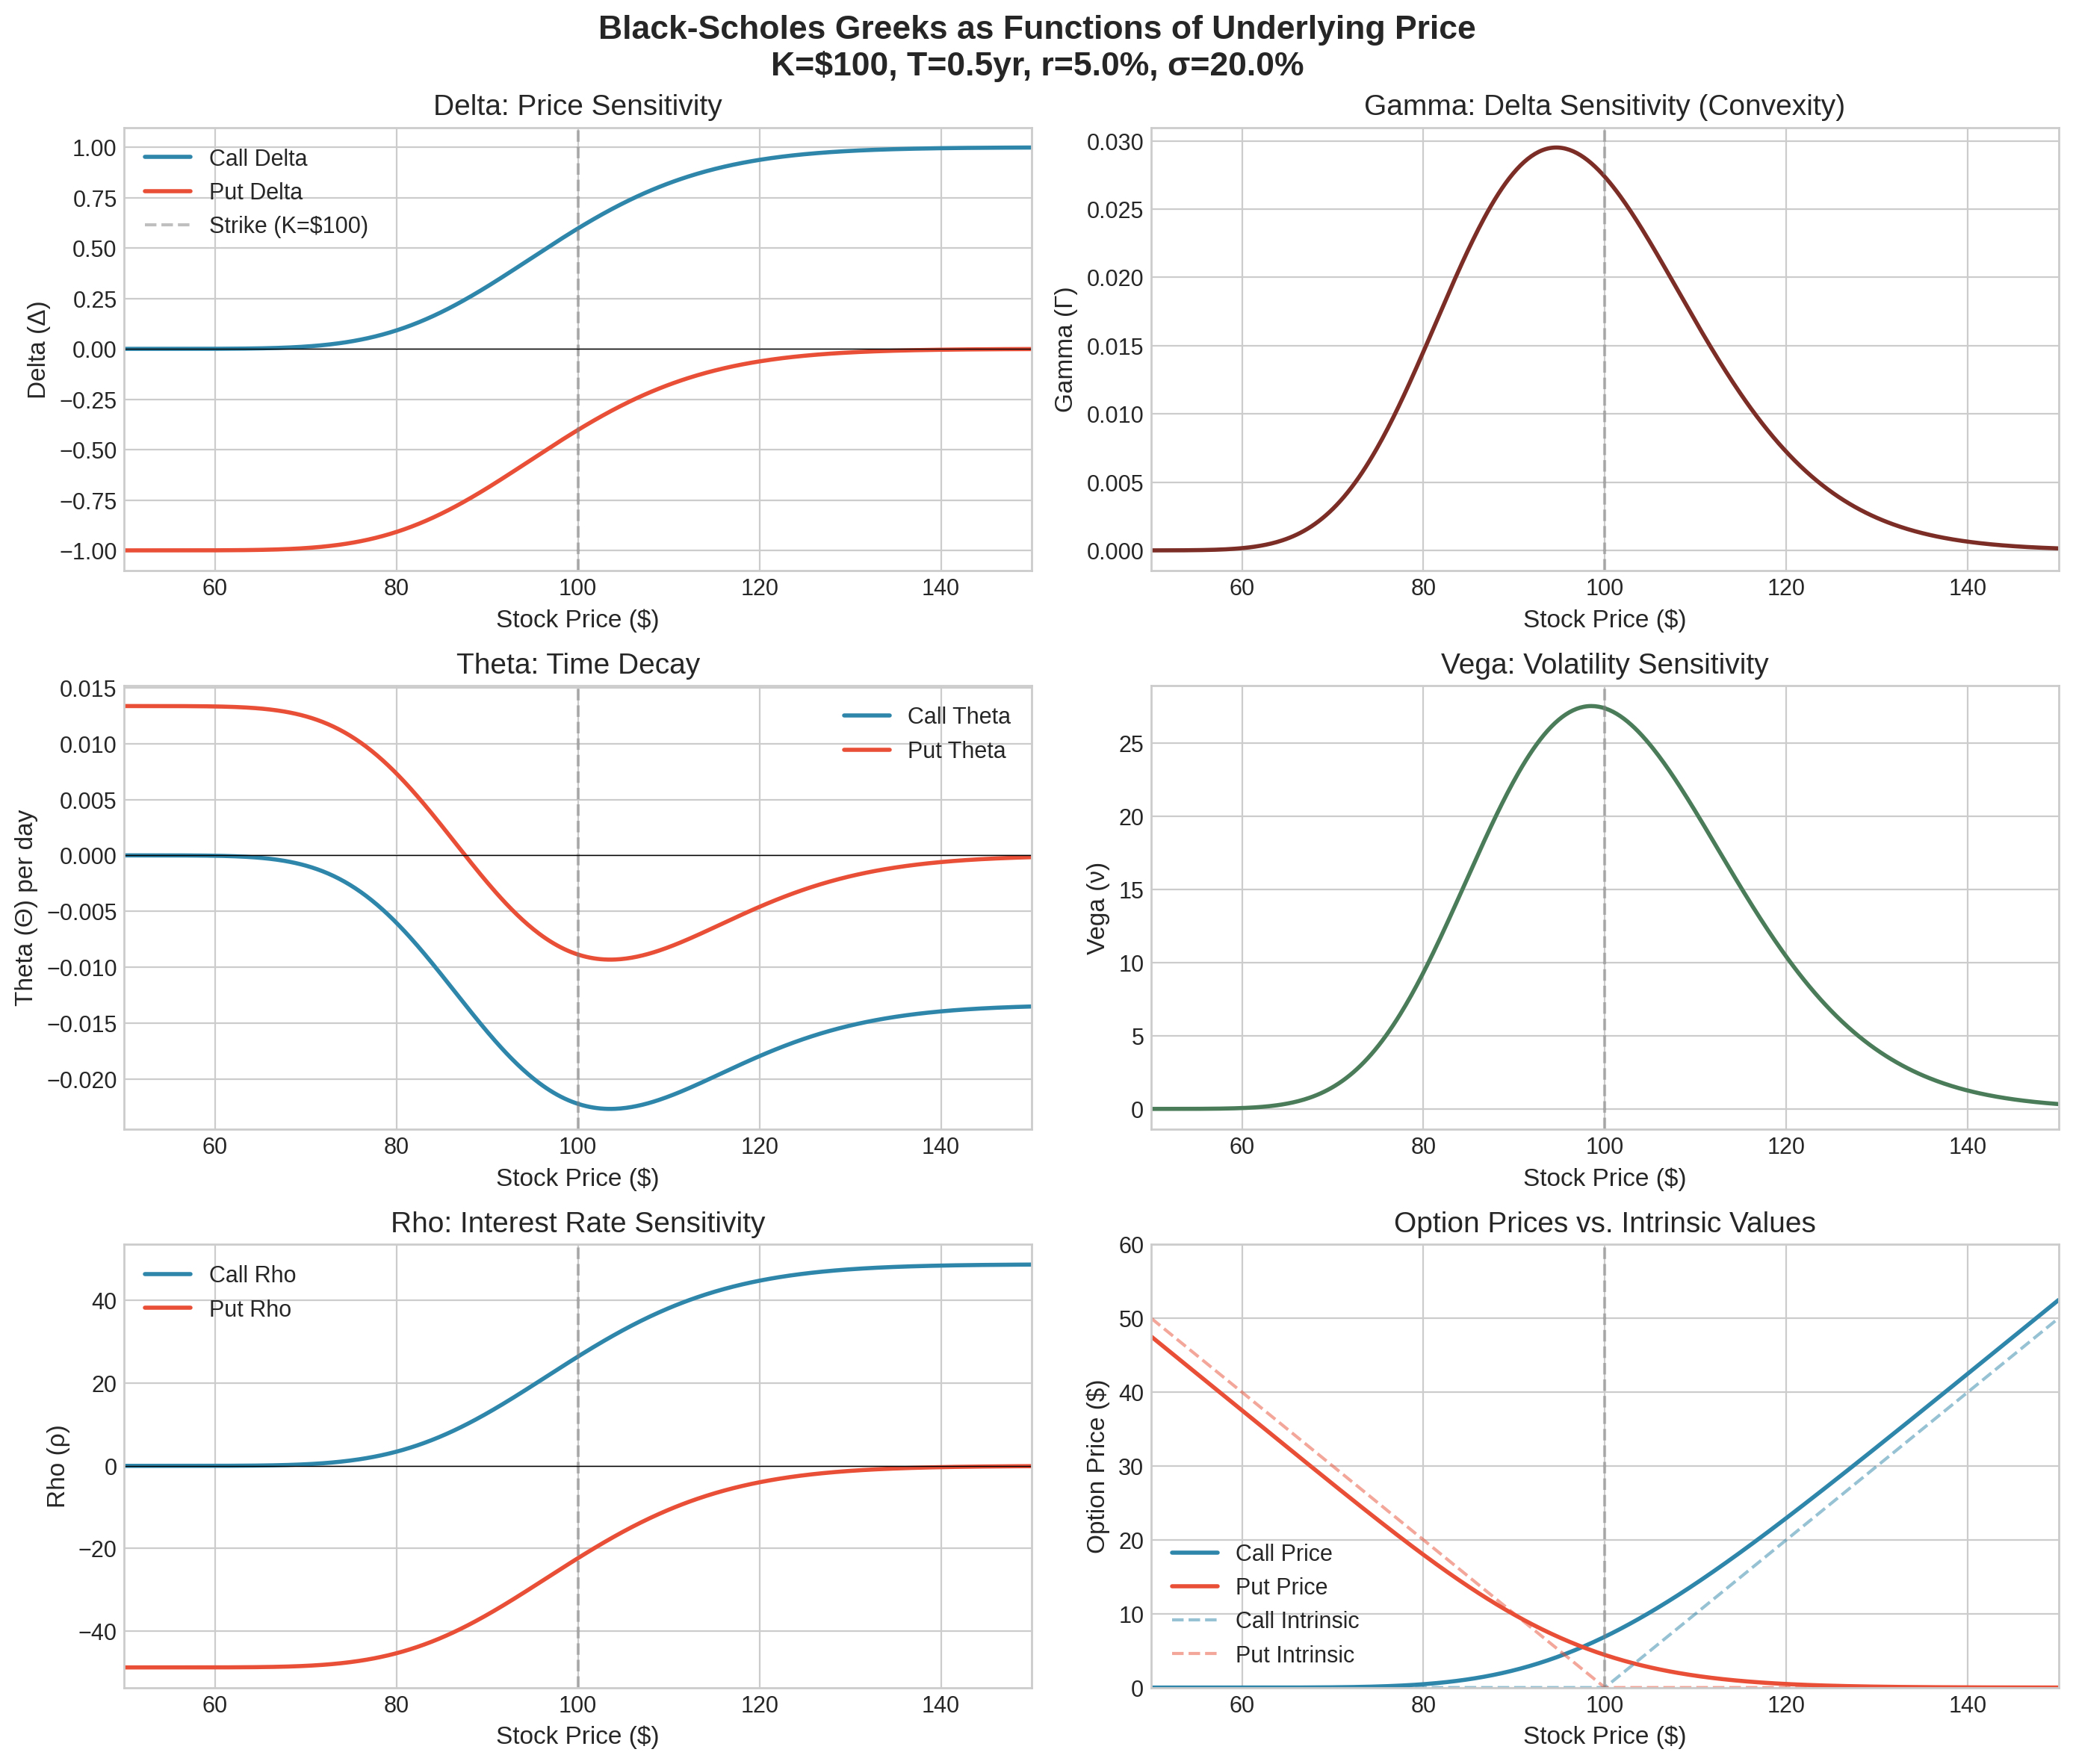


Plot saved to 'plot.png'


In [4]:
# Generate stock price range
S_range = np.linspace(50, 150, 500)

# Compute Greeks across the price range
greeks_range = BlackScholesGreeks(S_range, K, T, r, sigma)

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Black-Scholes Greeks as Functions of Underlying Price\n' + 
             f'K=${K}, T={T}yr, r={r*100}%, σ={sigma*100}%', 
             fontsize=16, fontweight='bold')

# Color scheme
call_color = '#2E86AB'
put_color = '#E94F37'

# 1. Delta
ax1 = axes[0, 0]
ax1.plot(S_range, greeks_range.delta_call(), label='Call Delta', color=call_color, linewidth=2)
ax1.plot(S_range, greeks_range.delta_put(), label='Put Delta', color=put_color, linewidth=2)
ax1.axvline(x=K, color='gray', linestyle='--', alpha=0.5, label=f'Strike (K=${K})')
ax1.axhline(y=0, color='black', linewidth=0.5)
ax1.set_xlabel('Stock Price ($)')
ax1.set_ylabel('Delta (Δ)')
ax1.set_title('Delta: Price Sensitivity')
ax1.legend(loc='best')
ax1.set_xlim([50, 150])

# 2. Gamma
ax2 = axes[0, 1]
ax2.plot(S_range, greeks_range.gamma(), color='#7B2D26', linewidth=2)
ax2.axvline(x=K, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel('Stock Price ($)')
ax2.set_ylabel('Gamma (Γ)')
ax2.set_title('Gamma: Delta Sensitivity (Convexity)')
ax2.set_xlim([50, 150])

# 3. Theta
ax3 = axes[1, 0]
ax3.plot(S_range, greeks_range.theta_call()/365, label='Call Theta', color=call_color, linewidth=2)
ax3.plot(S_range, greeks_range.theta_put()/365, label='Put Theta', color=put_color, linewidth=2)
ax3.axvline(x=K, color='gray', linestyle='--', alpha=0.5)
ax3.axhline(y=0, color='black', linewidth=0.5)
ax3.set_xlabel('Stock Price ($)')
ax3.set_ylabel('Theta (Θ) per day')
ax3.set_title('Theta: Time Decay')
ax3.legend(loc='best')
ax3.set_xlim([50, 150])

# 4. Vega
ax4 = axes[1, 1]
ax4.plot(S_range, greeks_range.vega(), color='#4A7C59', linewidth=2)
ax4.axvline(x=K, color='gray', linestyle='--', alpha=0.5)
ax4.set_xlabel('Stock Price ($)')
ax4.set_ylabel('Vega (ν)')
ax4.set_title('Vega: Volatility Sensitivity')
ax4.set_xlim([50, 150])

# 5. Rho
ax5 = axes[2, 0]
ax5.plot(S_range, greeks_range.rho_call(), label='Call Rho', color=call_color, linewidth=2)
ax5.plot(S_range, greeks_range.rho_put(), label='Put Rho', color=put_color, linewidth=2)
ax5.axvline(x=K, color='gray', linestyle='--', alpha=0.5)
ax5.axhline(y=0, color='black', linewidth=0.5)
ax5.set_xlabel('Stock Price ($)')
ax5.set_ylabel('Rho (ρ)')
ax5.set_title('Rho: Interest Rate Sensitivity')
ax5.legend(loc='best')
ax5.set_xlim([50, 150])

# 6. Option Prices
ax6 = axes[2, 1]
ax6.plot(S_range, greeks_range.call_price(), label='Call Price', color=call_color, linewidth=2)
ax6.plot(S_range, greeks_range.put_price(), label='Put Price', color=put_color, linewidth=2)
ax6.plot(S_range, np.maximum(S_range - K, 0), '--', color=call_color, alpha=0.5, label='Call Intrinsic')
ax6.plot(S_range, np.maximum(K - S_range, 0), '--', color=put_color, alpha=0.5, label='Put Intrinsic')
ax6.axvline(x=K, color='gray', linestyle='--', alpha=0.5)
ax6.set_xlabel('Stock Price ($)')
ax6.set_ylabel('Option Price ($)')
ax6.set_title('Option Prices vs. Intrinsic Values')
ax6.legend(loc='best')
ax6.set_xlim([50, 150])
ax6.set_ylim([0, 60])

plt.tight_layout()
plt.savefig('greeks_calculation_options_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## Greeks Surface: Variation with Time to Maturity

Let's examine how Gamma and Vega evolve as the option approaches expiration.

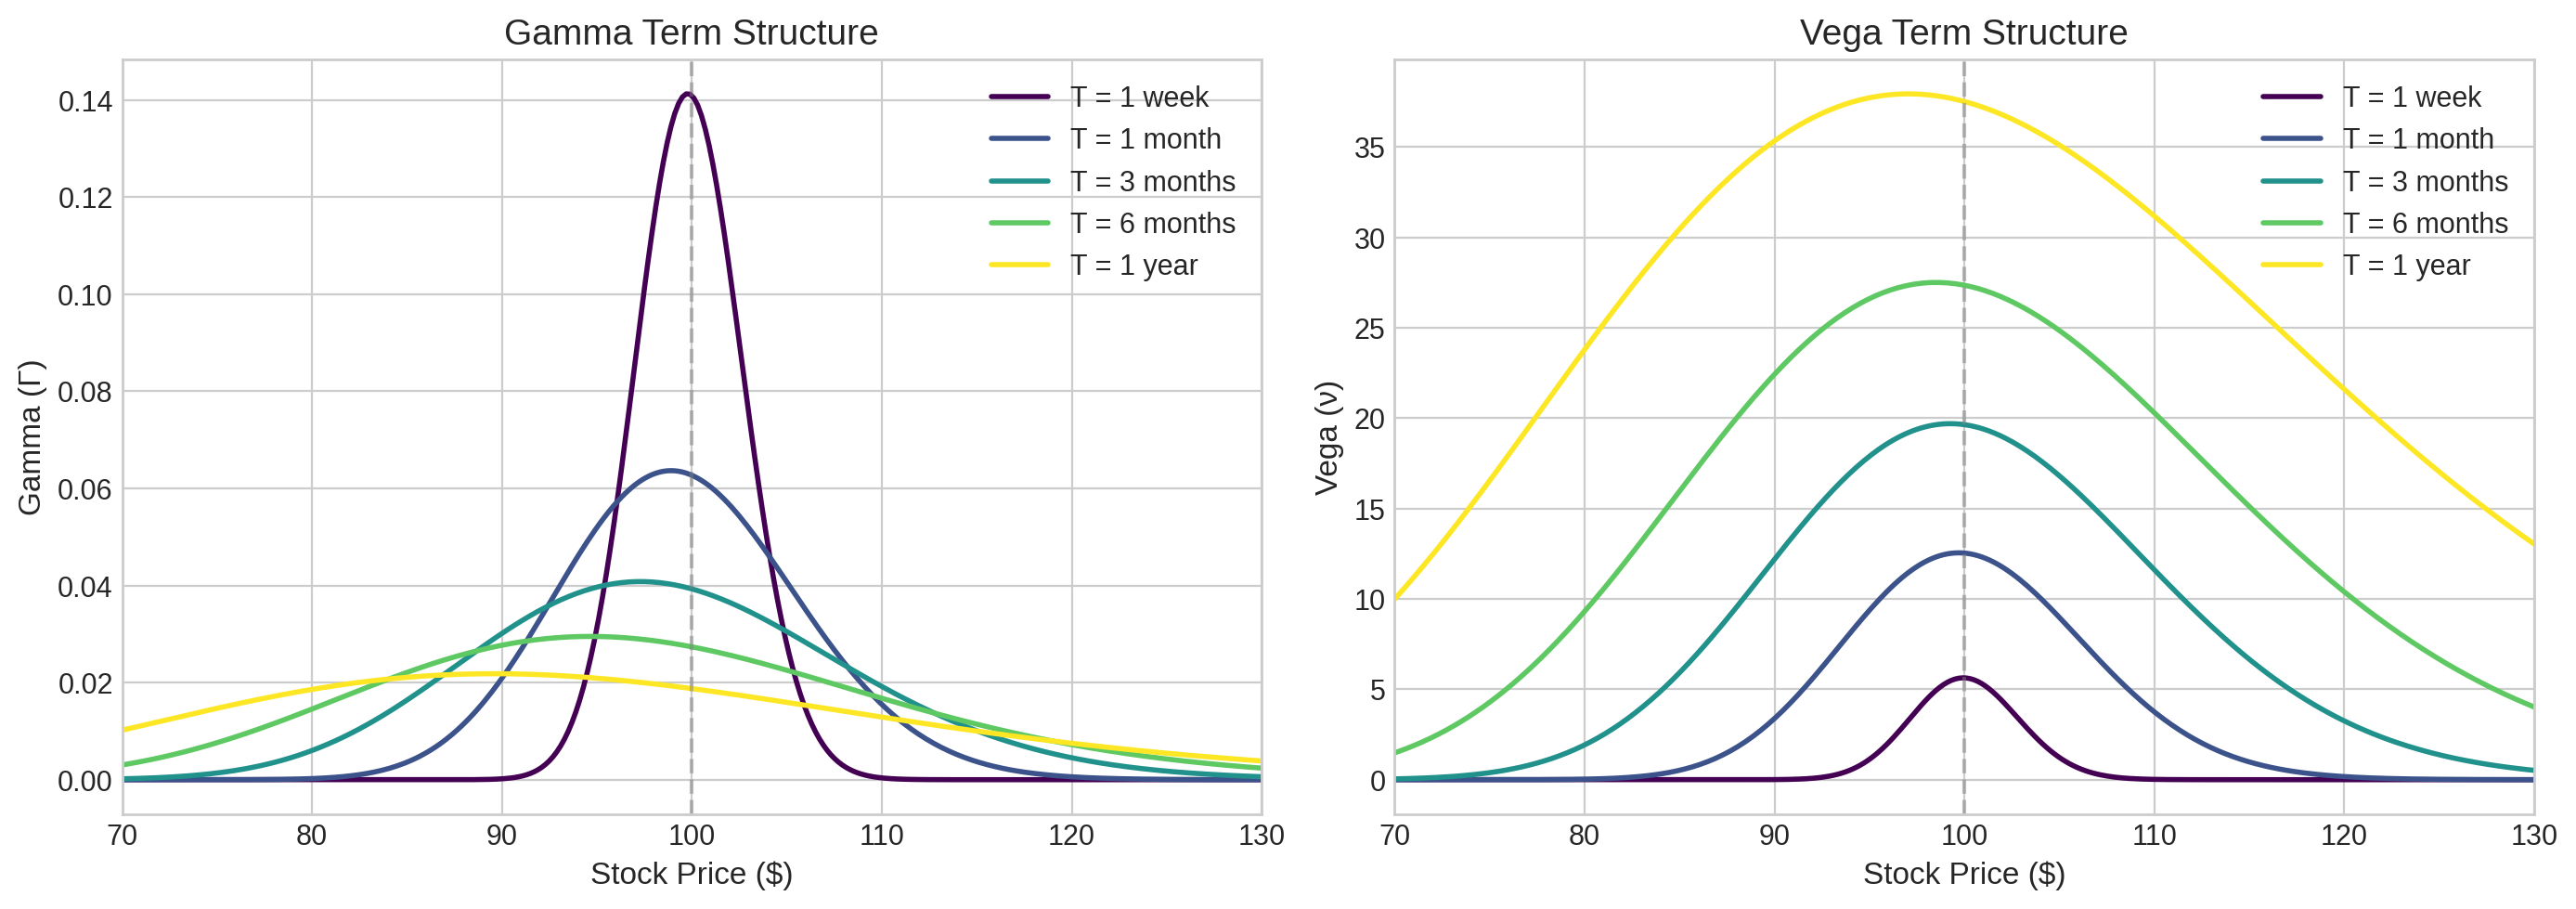

In [5]:
# Time to maturity range
T_values = [0.02, 0.1, 0.25, 0.5, 1.0]
labels = ['1 week', '1 month', '3 months', '6 months', '1 year']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.viridis(np.linspace(0, 1, len(T_values)))

# Gamma vs T
for i, (T_val, label) in enumerate(zip(T_values, labels)):
    greeks_T = BlackScholesGreeks(S_range, K, T_val, r, sigma)
    axes[0].plot(S_range, greeks_T.gamma(), label=f'T = {label}', color=colors[i], linewidth=2)

axes[0].axvline(x=K, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Stock Price ($)')
axes[0].set_ylabel('Gamma (Γ)')
axes[0].set_title('Gamma Term Structure')
axes[0].legend(loc='best')
axes[0].set_xlim([70, 130])

# Vega vs T
for i, (T_val, label) in enumerate(zip(T_values, labels)):
    greeks_T = BlackScholesGreeks(S_range, K, T_val, r, sigma)
    axes[1].plot(S_range, greeks_T.vega(), label=f'T = {label}', color=colors[i], linewidth=2)

axes[1].axvline(x=K, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Stock Price ($)')
axes[1].set_ylabel('Vega (ν)')
axes[1].set_title('Vega Term Structure')
axes[1].legend(loc='best')
axes[1].set_xlim([70, 130])

plt.tight_layout()
plt.show()

## Key Observations

### Delta Behavior
- Call delta ranges from 0 (deep OTM) to 1 (deep ITM)
- Put delta ranges from -1 (deep ITM) to 0 (deep OTM)
- At-the-money options have delta ≈ ±0.5

### Gamma Characteristics
- Peaks at-the-money and approaches zero for deep ITM/OTM
- Increases dramatically as expiration approaches
- Critical for understanding hedging costs

### Theta Patterns
- Most negative (largest decay) for ATM options
- Time decay accelerates as expiration nears
- Put theta can be positive for deep ITM puts (due to interest rate effects)

### Vega Profile
- Maximum for ATM options
- Longer-dated options have higher vega
- Critical for volatility trading strategies

### Rho Impact
- Call rho is positive (higher rates increase call value)
- Put rho is negative (higher rates decrease put value)
- Generally less significant than other Greeks for short-dated options

## Conclusion

The Greeks provide essential tools for understanding and managing options risk. In this notebook, we:

1. Derived the analytical formulas for Delta, Gamma, Theta, Vega, and Rho under the Black-Scholes framework
2. Implemented a comprehensive Python class for computing these sensitivities
3. Visualized how each Greek varies with the underlying price
4. Examined the term structure effects on Gamma and Vega

These risk measures form the foundation for:
- **Delta hedging** strategies to neutralize directional exposure
- **Gamma scalping** to profit from realized volatility
- **Theta decay** strategies for income generation
- **Vega trades** to express views on volatility

Understanding these sensitivities is crucial for effective options portfolio management and risk control.